# COURSE: PCA and multivariate neural signal processing
## SECTION: Independent components analysis
### VIDEO: Python: Explore IC distributions in real data
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
from pytopo import topoplotIndie
from filterFGxfun import filterFGx

In [2]:
## preliminary 

# mat file containing EEG data
matfile = sio.loadmat('MATLAB_data_files//restingstate64chans.mat')
EEG = matfile['EEG'][0,0]

tmpdat = (EEG['icaweights']@EEG['icasphere'])@np.reshape(EEG['data'],(EEG['nbchan'][0][0],-1),order='F')
EEG['icaact'] = np.reshape(tmpdat,(EEG['data'].shape))


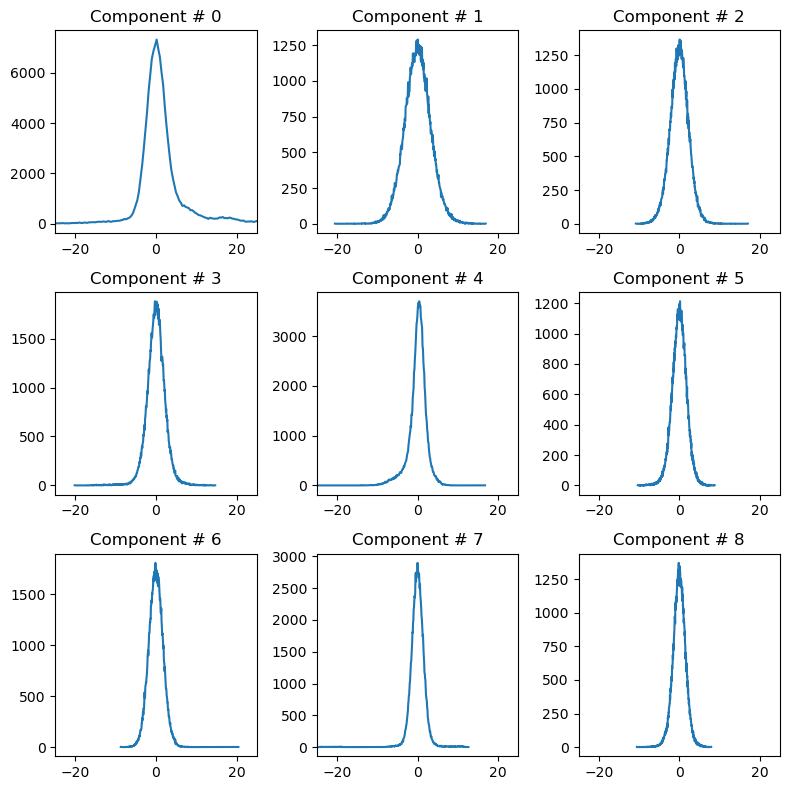

In [3]:
## show IC topographies and data distributions

# histogram parameters and output matrices
nbins = 500
x = np.zeros((9,nbins))
y = np.zeros((9,nbins))

_,axs = plt.subplots(3,3,figsize=(8,8))
axs = axs.flatten()

# let's inspect the first 9 components
for i in range(9):
    
    # plot distribution
    binY,binX = np.histogram(EEG['icaact'][i,:],bins=nbins)
    binX = (binX[:-1]+binX[1:])/2
    axs[i].plot(binX,binY)
    axs[i].set_xlim([-25,25])
    axs[i].set_title(f'Component # {i}')
    
    # store normalized histograms for later
    y[i,:] = binY / np.max(binY)
    x[i,:] = binX
    

plt.tight_layout()
plt.show()

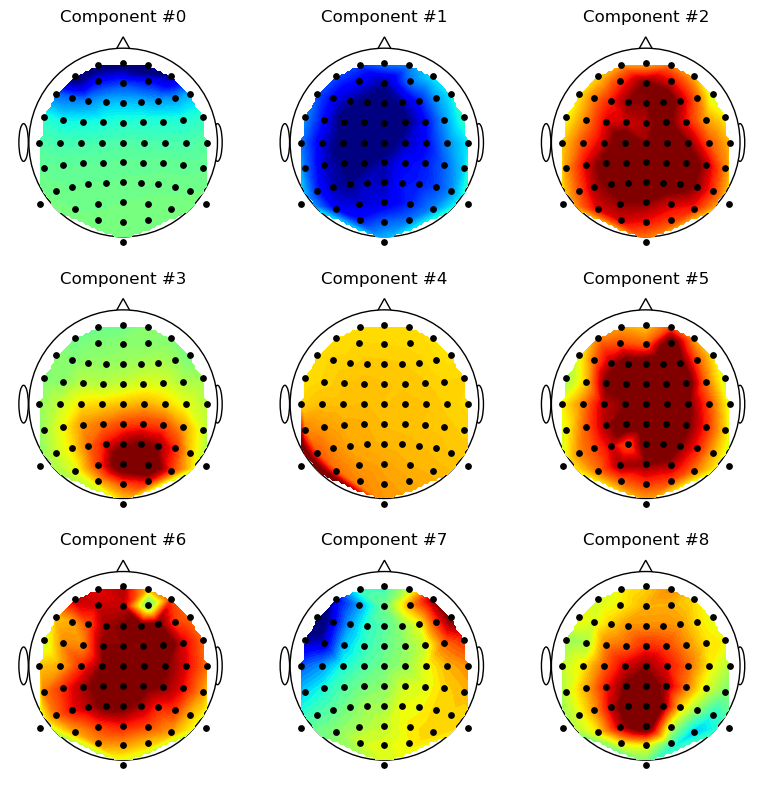

In [4]:
_,axs = plt.subplots(3,3,figsize=(8,8))
axs = axs.flatten()

# let's inspect the first 9 components
for i in range(9):
    # plot topographical maps
    topoplotIndie(EEG['icawinv'][:,i],EEG['chanlocs'],f'Component #{i}',axs[i])

plt.tight_layout()
plt.show()

C:\Users\Rob\AppData\Local\Temp\ipykernel_33708\3320627476.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(t),np.log(g),'k--',linewidth=3)
C:\Users\Rob\AppData\Local\Temp\ipykernel_33708\3320627476.py:11: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(t),np.log(g),'k--',linewidth=3)


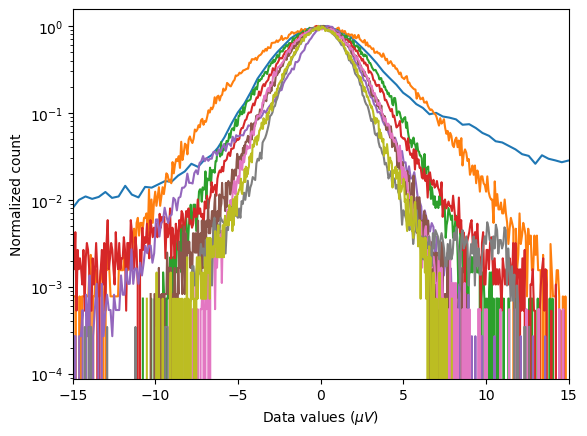

In [6]:
## show all distributions in one plot

plt.plot(x.T,y.T)
plt.xlim([-15,15])


# for comparison, a Gaussian on top
h = 5
t = np.linspace(-15,15,301)
g = np.exp( -4*np.log(2)*t**2 / h**2 )
plt.plot(np.log(t),np.log(g),'k--',linewidth=3)

plt.xlabel('Data values ($\mu V$)')
plt.ylabel('Normalized count')

plt.show()